In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your inference results
htoBB_df = pd.read_csv("HToBB_inference.csv")
ztonunu_df = pd.read_csv("ZToNuNu_inference.csv")

# Extract predicted probabilities
htoBB_probs = htoBB_df[[f"prob_{i}" for i in range(10)]].to_numpy()
ztonunu_probs = ztonunu_df[[f"prob_{i}" for i in range(10)]].to_numpy()

# Stack everything
all_probs = np.vstack([htoBB_probs, ztonunu_probs])
all_labels = np.array([1] * len(htoBB_probs) + [0] * len(ztonunu_probs))

# Compute discriminant using prob_4 (Hbb) and prob_0 (QCD)
p_hbb = all_probs[:, 4]
p_qcd = all_probs[:, 0]
disc = p_hbb / (p_hbb + p_qcd)

# AUC computation
fpr, tpr, _ = roc_curve(all_labels, disc)
roc_auc = auc(fpr, tpr)

# Debug prints
print(f"Mean prob_4 (Hbb): {np.mean(htoBB_probs[:, 4])}")
print(f"Mean prob_0 (QCD): {np.mean(ztonunu_probs[:, 0])}")
print(f"Mean prob_4 (QCD): {np.mean(ztonunu_probs[:, 4])}")
print(f"Mean prob_0 (Hbb): {np.mean(htoBB_probs[:, 0])}")
print(f"AUC (Hbb vs QCD): {roc_auc:.3f}")

# Plotting ROC curve
plt.figure()
plt.plot(tpr, np.clip(fpr, 1e-5, 1.0), label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [1e-5, 1.0], 'k--', alpha=0.3)
plt.xlim(0, 1)
plt.ylim(1e-5, 1.0)
plt.xscale('linear')
plt.yscale('log')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate (log scale)")
plt.title("ROC: H→bb vs QCD (Z→νν)")
plt.legend(loc="lower right")
plt.grid(True, which="both", ls=":")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'HToBB_inference.csv'

In [ ]:
print(f"Discriminant min/max (H→bb): {disc[all_labels == 1].min():.5f} / {disc[all_labels == 1].max():.5f}")
print(f"Discriminant min/max (QCD):   {disc[all_labels == 0].min():.5f} / {disc[all_labels == 0].max():.5f}")

Discriminant min/max (H→bb): 0.22773 / 0.80934
Discriminant min/max (QCD):   0.01232 / 0.33074


In [ ]:
print("Total HToBB events:", len(htoBB_probs))
print("Total ZToNuNu (QCD) events:", len(ztonunu_probs))
print("Total combined used in AUC:", len(disc))
print("Top 10 HToBB discriminants:")
print(disc[all_labels == 1][:10])
print("Top 10 QCD discriminants:")
print(disc[all_labels == 0][:10])

Total HToBB events: 499995
Total ZToNuNu (QCD) events: 499968
Total combined used in AUC: 999963
Top 10 HToBB discriminants:
[0.49545202 0.45462094 0.57688978 0.52940698 0.49299916 0.53295606
 0.57923316 0.50994939 0.59957203 0.57394754]
Top 10 QCD discriminants:
[0.14697689 0.06865641 0.0354874  0.03353389 0.04373089 0.01777273
 0.02706043 0.1343856  0.0323102  0.04089236]


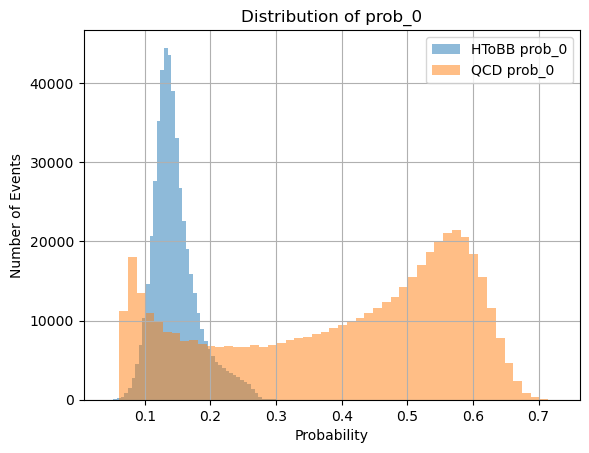

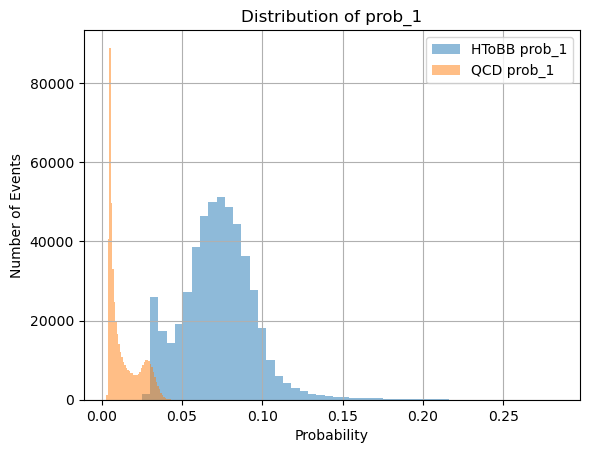

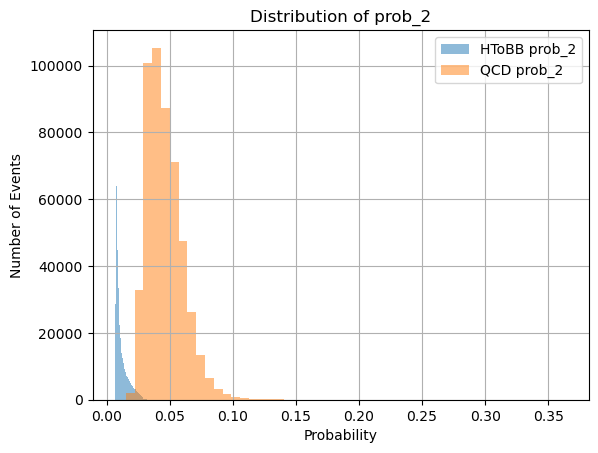

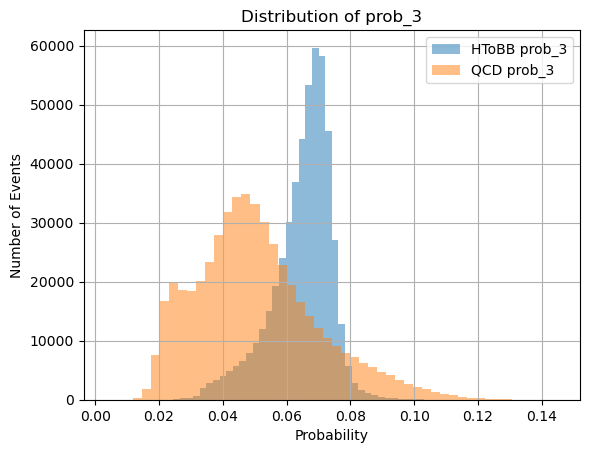

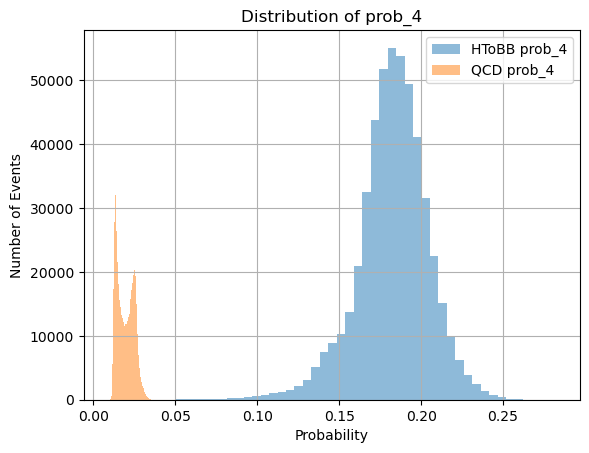

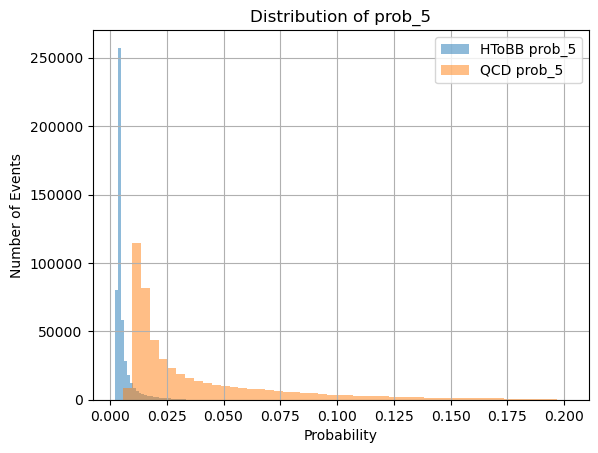

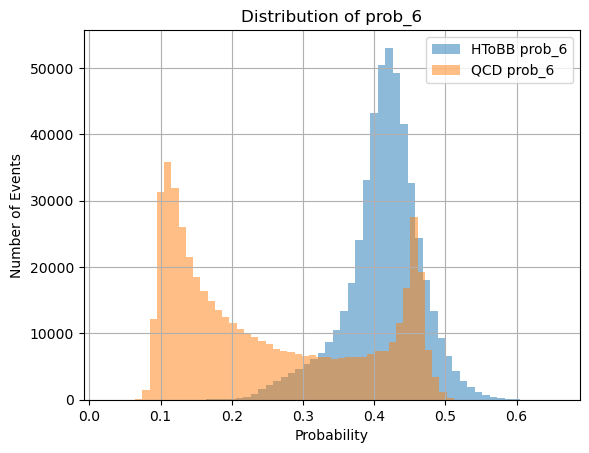

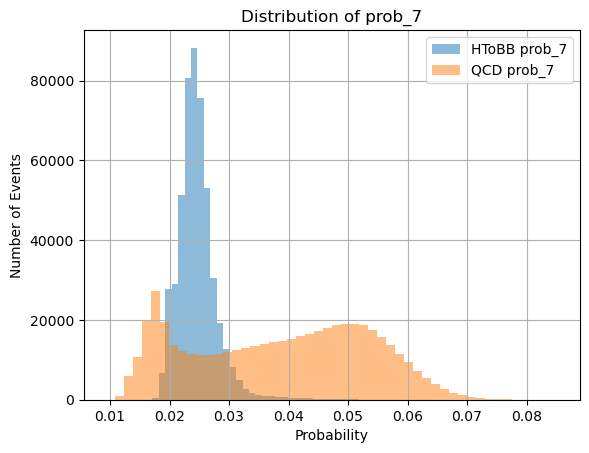

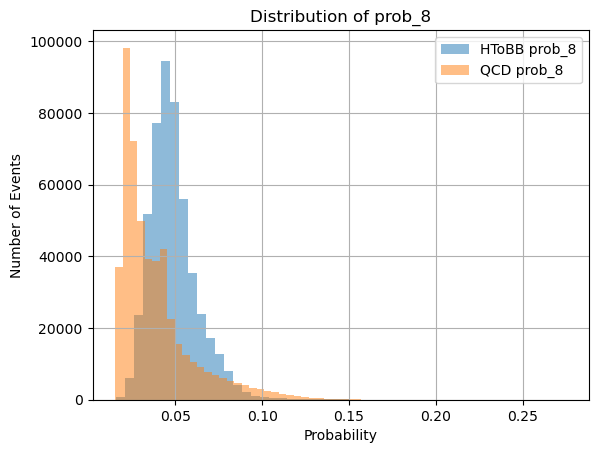

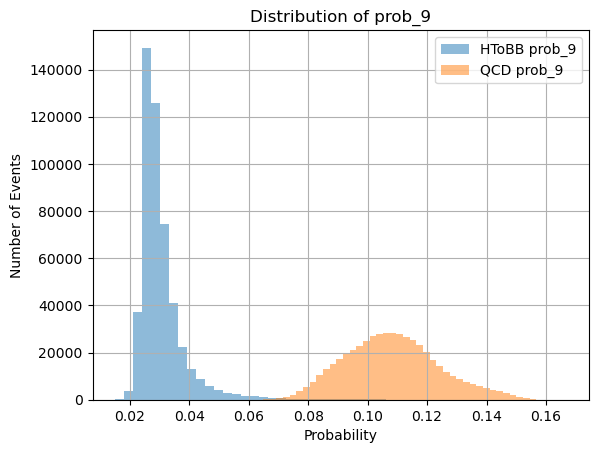

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

hbb_probs = np.loadtxt("HToBB_inference.csv", delimiter=",", skiprows=1, usecols=range(14, 24))
qcd_probs = np.loadtxt("ZToNuNu_inference.csv", delimiter=",", skiprows=1, usecols=range(14, 24))

for i in range(10):
    plt.hist(hbb_probs[:, i], bins=50, alpha=0.5, label=f"HToBB prob_{i}")
    plt.hist(qcd_probs[:, i], bins=50, alpha=0.5, label=f"QCD prob_{i}")
    plt.title(f"Distribution of prob_{i}")
    plt.xlabel("Probability")
    plt.ylabel("Number of Events")
    plt.legend()
    plt.grid(True)
    plt.show()

Columns in CSV: ['file', 'event_index', 'truth_label', 'label_name', 'logit_0', 'logit_1', 'logit_2', 'logit_3', 'logit_4', 'logit_5', 'logit_6', 'logit_7', 'logit_8', 'logit_9', 'prob_0', 'prob_1', 'prob_2', 'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8', 'prob_9']

--- Shapes ---
H→bb shape: (499995,)
QCD shape: (499968,)

--- Value ranges ---
H→bb prob_4 range: 0.024467671 to 0.282961309
QCD prob_4 range: 0.00780744 to 0.036272265

--- Unique label names ---
H→bb file: ['unknown']
QCD file: ['QCD']

AUC: 0.9999990262059398


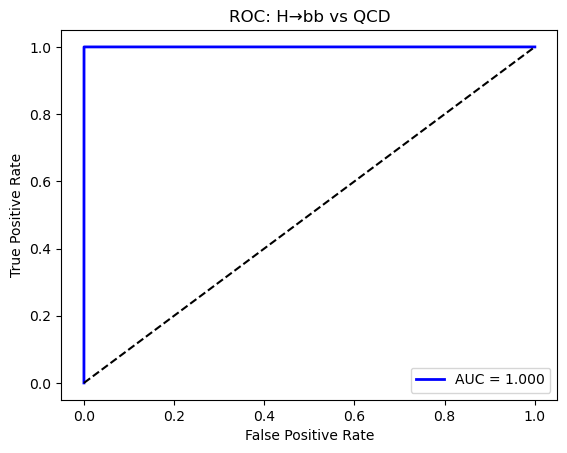

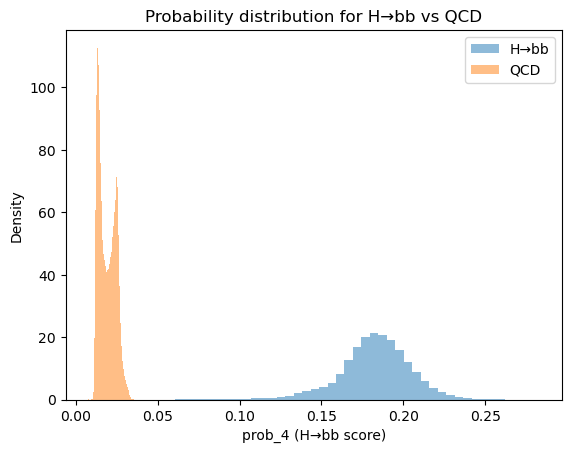

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ==== Load prediction CSVs ====
hbb_df = pd.read_csv("HToBB_inference.csv")
qcd_df = pd.read_csv("ZToNuNu_inference.csv")

# ==== Check columns ====
print("Columns in CSV:", hbb_df.columns.tolist())

# ==== Extract probability for H→bb (prob_4) ====
p_hbb = hbb_df["prob_4"].values
p_qcd = qcd_df["prob_4"].values

# ==== Basic stats ====
print("\n--- Shapes ---")
print("H→bb shape:", p_hbb.shape)
print("QCD shape:", p_qcd.shape)

print("\n--- Value ranges ---")
print("H→bb prob_4 range:", np.min(p_hbb), "to", np.max(p_hbb))
print("QCD prob_4 range:", np.min(p_qcd), "to", np.max(p_qcd))

print("\n--- Unique label names ---")
print("H→bb file:", hbb_df["label_name"].unique())
print("QCD file:", qcd_df["label_name"].unique())

# ==== Prepare for ROC ====
y_true = np.concatenate([
    np.ones_like(p_hbb),  # 1 for H→bb
    np.zeros_like(p_qcd)  # 0 for QCD
])

y_scores = np.concatenate([p_hbb, p_qcd])  # predicted probability for H→bb

# ==== ROC computation ====
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
print("\nAUC:", roc_auc)

# ==== Plot ROC ====
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: H→bb vs QCD")
plt.legend(loc="lower right")
plt.show()

# ==== Histogram check for leakage ====
plt.figure()
plt.hist(p_hbb, bins=50, alpha=0.5, label="H→bb", density=True)
plt.hist(p_qcd, bins=50, alpha=0.5, label="QCD", density=True)
plt.xlabel("prob_4 (H→bb score)")
plt.ylabel("Density")
plt.legend()
plt.title("Probability distribution for H→bb vs QCD")
plt.show()

In [ ]:
print(data.columns.tolist())

['part_px', 'part_py', 'part_pz', 'part_energy', 'part_deta', 'part_dphi', 'part_d0val', 'part_d0err', 'part_dzval', 'part_dzerr', 'part_charge', 'part_isChargedHadron', 'part_isNeutralHadron', 'part_isPhoton', 'part_isElectron', 'part_isMuon', 'label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_energy', 'jet_nparticles', 'jet_sdmass', 'jet_tau1', 'jet_tau2', 'jet_tau3', 'jet_tau4', 'aux_genpart_eta', 'aux_genpart_phi', 'aux_genpart_pid', 'aux_genpart_pt', 'aux_truth_match']


In [ ]:
import uproot
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

# ==== CONFIG ====
root_file = "../data/JetClass/val_5M/HToBB_120.root"  # <-- change if needed
# =================

# Load ROOT file into DataFrame
with uproot.open(root_file) as file:
    tree = file[file.keys()[0]]  # first TTree
    data = tree.arrays(library="pd")

print(f"Loaded {data.shape[0]} events with {data.shape[1]} features.")
print("Columns:", data.columns.tolist())

# Create binary label: 1 for Hbb, 0 for QCD
y = (data["label_Hbb"] == 1).astype(int)

# Drop all label_* columns to avoid using truth info directly
feature_cols = [c for c in data.columns if not c.startswith("label_")]
X = data[feature_cols]

print(f"Using {len(feature_cols)} features after dropping labels.")

# Check each feature individually for leakage
suspect_features = []
for col in tqdm(X.columns, desc="Checking features"):
    try:
        vals = X[col].values
        if np.issubdtype(vals.dtype, np.number):
            vals = vals.reshape(-1, 1)
            model = LogisticRegression(max_iter=1000)
            model.fit(vals, y)
            preds = model.predict_proba(vals)[:, 1]
            auc = roc_auc_score(y, preds)
            if auc > 0.99:  # suspiciously high
                suspect_features.append((col, auc))
    except Exception as e:
        pass

print("suspected features (AUC > 0.99)")
for feat, auc in suspect_features:
    print(f"{feat}: AUC = {auc:.6f}")

if not suspect_features:
    print("No single feature shows perfect separation — leakage might be multi-feature.")

Loaded 100000 events with 41 features.
Columns: ['part_px', 'part_py', 'part_pz', 'part_energy', 'part_deta', 'part_dphi', 'part_d0val', 'part_d0err', 'part_dzval', 'part_dzerr', 'part_charge', 'part_isChargedHadron', 'part_isNeutralHadron', 'part_isPhoton', 'part_isElectron', 'part_isMuon', 'label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_energy', 'jet_nparticles', 'jet_sdmass', 'jet_tau1', 'jet_tau2', 'jet_tau3', 'jet_tau4', 'aux_genpart_eta', 'aux_genpart_phi', 'aux_genpart_pid', 'aux_genpart_pt', 'aux_truth_match']
Using 31 features after dropping labels.


Checking features: 100%|██████████| 31/31 [00:00<00:00, 1466.97it/s]

suspected features (AUC > 0.99)
No single feature shows perfect separation — leakage might be multi-feature.


Sophon AUC: 1.000, TPR at FPR=0.0001: 0.999
ParT   AUC: 0.999, TPR at FPR=0.0001: 0.541


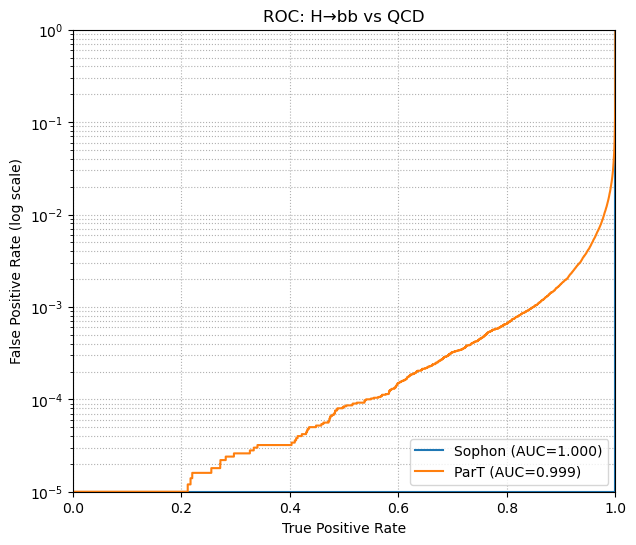

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# === Load Sophon CSVs ===
hbb_sophon = pd.read_csv("HToBB_inference.csv")
qcd_sophon = pd.read_csv("ZToNuNu_inference.csv")

# Combine Sophon probabilities
sophon_probs = np.vstack([hbb_sophon[[f"prob_{i}" for i in range(10)]].to_numpy(),
                          qcd_sophon[[f"prob_{i}" for i in range(10)]].to_numpy()])
sophon_labels = np.array([1] * len(hbb_sophon) + [0] * len(qcd_sophon))

# Compute discriminant for Sophon
p_hbb_s = sophon_probs[:, 4]  # prob_4 = Hbb
p_qcd_s = sophon_probs[:, 0]  # prob_0 = QCD
disc_s = p_hbb_s / (p_hbb_s + p_qcd_s)

# ROC for Sophon
fpr_s, tpr_s, _ = roc_curve(sophon_labels, disc_s)
auc_s = auc(fpr_s, tpr_s)

# === Load ParT CSV from Jason ===
part_df = pd.read_csv("full_inference_output.csv")
p_hbb_p = part_df["P_1"].to_numpy()  # Hbb
p_qcd_p = part_df["P_0"].to_numpy()  # QCD
labels_p = part_df["truth"].to_numpy()
mask_p = np.isin(labels_p, [0, 1])
y_true_p = (labels_p[mask_p] == 1).astype(int)
disc_p = p_hbb_p[mask_p] / (p_hbb_p[mask_p] + p_qcd_p[mask_p])

# ROC for ParT
fpr_p, tpr_p, _ = roc_curve(y_true_p, disc_p)
auc_p = auc(fpr_p, tpr_p)

# === Function to get TPR at a specific FPR ===
def tpr_at_fpr(target_fpr, fpr, tpr):
    idx = np.argmin(np.abs(fpr - target_fpr))
    return tpr[idx]

target_fpr = 1e-4
tpr_s_at = tpr_at_fpr(target_fpr, fpr_s, tpr_s)
tpr_p_at = tpr_at_fpr(target_fpr, fpr_p, tpr_p)

print(f"Sophon AUC: {auc_s:.3f}, TPR at FPR={target_fpr}: {tpr_s_at:.3f}")
print(f"ParT   AUC: {auc_p:.3f}, TPR at FPR={target_fpr}: {tpr_p_at:.3f}")

# === Plot both ROC curves ===
plt.figure(figsize=(7, 6))
plt.plot(tpr_s, np.clip(fpr_s, 1e-5, 1.0), label=f"Sophon (AUC={auc_s:.3f})")
plt.plot(tpr_p, np.clip(fpr_p, 1e-5, 1.0), label=f"ParT (AUC={auc_p:.3f})")
plt.xlim(0, 1)
plt.ylim(1e-5, 1.0)
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate (log scale)")
plt.title("ROC: H→bb vs QCD")
plt.legend(loc="lower right")
plt.grid(True, which="both", ls=":")
plt.show()

Mean prob_4 (Hbb): 0.18262041792876527
Mean prob_4 (QCD): 0.01923351632418475
AUC (Hbb vs QCD): 1.000


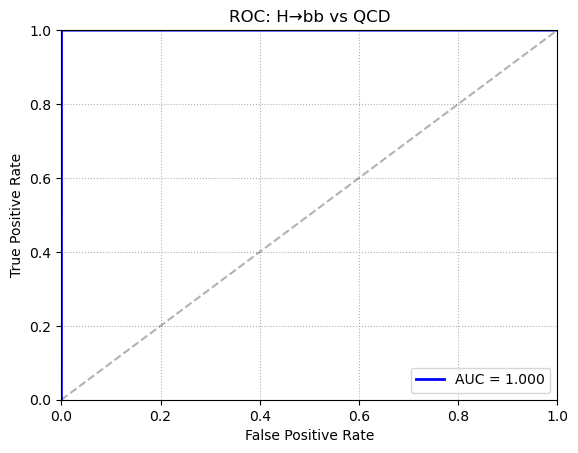

In [ ]:

htoBB_df = pd.read_csv("HToBB_inference.csv")
ztonunu_df = pd.read_csv("ZToNuNu_inference.csv")

htoBB_probs = htoBB_df[[f"prob_{i}" for i in range(10)]].to_numpy()
ztonunu_probs = ztonunu_df[[f"prob_{i}" for i in range(10)]].to_numpy()

all_labels = np.array([1] * len(htoBB_probs) + [0] * len(ztonunu_probs))

p_hbb_scores = np.concatenate([htoBB_probs[:, 4], ztonunu_probs[:, 4]])

fpr, tpr, _ = roc_curve(all_labels, p_hbb_scores)
roc_auc = auc(fpr, tpr)

print(f"Mean prob_4 (Hbb): {np.mean(htoBB_probs[:, 4])}")
print(f"Mean prob_4 (QCD): {np.mean(ztonunu_probs[:, 4])}")
print(f"AUC (Hbb vs QCD): {roc_auc:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color="blue", lw=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: H→bb vs QCD")
plt.legend(loc="lower right")
plt.grid(True, which="both", ls=":")
plt.show()

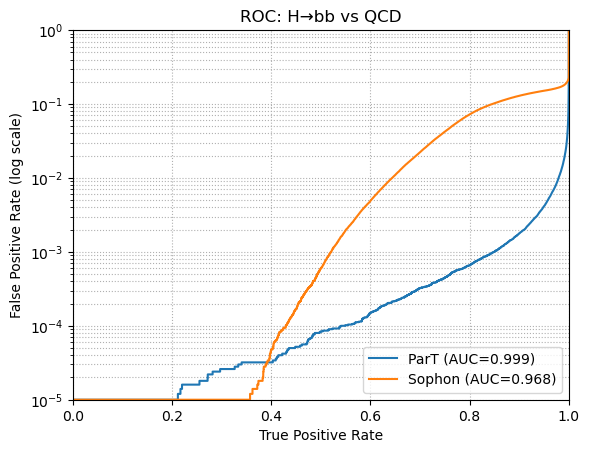

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ===== Load Jason's ParT results =====
part_df = pd.read_csv("full_inference_output.csv")  # Jason's file
part_truth = part_df["truth"].values
part_probs = part_df[[f"P_{i}" for i in range(10)]].values

mask_part = np.isin(part_truth, [0, 1])
y_true_part = (part_truth[mask_part] == 1).astype(int)
p_hbb_part = part_probs[mask_part, 1]
p_qcd_part = part_probs[mask_part, 0]
disc_part = p_hbb_part / (p_hbb_part + p_qcd_part)

fpr_part, tpr_part, _ = roc_curve(y_true_part, disc_part)
roc_auc_part = auc(fpr_part, tpr_part)

# ===== Load your Sophon results =====
hbb_df = pd.read_csv("HToBB_inference.csv")
qcd_df = pd.read_csv("ZToNuNu_inference.csv")

hbb_probs = hbb_df[[f"prob_{i}" for i in range(10)]].to_numpy()
qcd_probs = qcd_df[[f"prob_{i}" for i in range(10)]].to_numpy()

all_probs = np.vstack([hbb_probs, qcd_probs])
all_labels = np.array([1] * len(hbb_probs) + [0] * len(qcd_probs))

mask_sophon = np.isin(all_labels, [0, 1])
y_true_sophon = (all_labels[mask_sophon] == 1).astype(int)
p_hbb_sophon = all_probs[mask_sophon, 1]
p_qcd_sophon = all_probs[mask_sophon, 0]
disc_sophon = p_hbb_sophon / (p_hbb_sophon + p_qcd_sophon)

fpr_sophon, tpr_sophon, _ = roc_curve(y_true_sophon, disc_sophon)
roc_auc_sophon = auc(fpr_sophon, tpr_sophon)

# ===== Plot both =====
eps = 1e-5
plt.figure()
plt.plot(tpr_part, np.clip(fpr_part, eps, 1.0), label=f"ParT (AUC={roc_auc_part:.3f})")
plt.plot(tpr_sophon, np.clip(fpr_sophon, eps, 1.0), label=f"Sophon (AUC={roc_auc_sophon:.3f})")
plt.xlim(0, 1)
plt.ylim(eps, 1.0)
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate (log scale)")
plt.title("ROC: H→bb vs QCD")
plt.legend(loc="lower right")
plt.grid(True, which="both", ls=":")
plt.savefig("plot_example.svg", format="svg", transparent=True, dpi=300)
plt.show()

ParT: Closest FPR to 0.001 is 0.001000, TPR = 0.848882
Sophon: Closest FPR to 0.001 is 0.001000, TPR = 0.520645


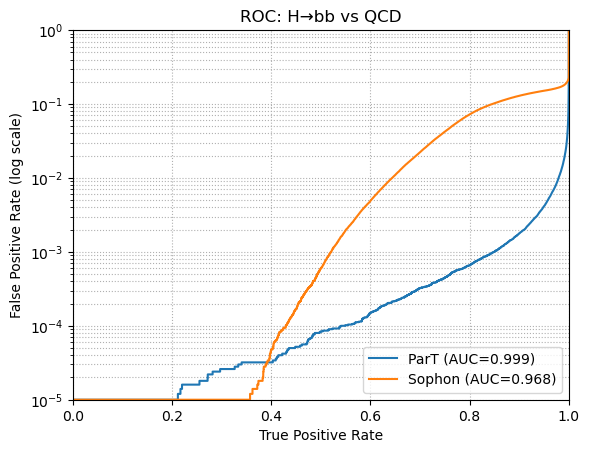

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ===== Load Jason's ParT results =====
part_df = pd.read_csv("full_inference_output.csv")  # Jason's file
part_truth = part_df["truth"].values
part_probs = part_df[[f"P_{i}" for i in range(10)]].values

mask_part = np.isin(part_truth, [0, 1])
y_true_part = (part_truth[mask_part] == 1).astype(int)
p_hbb_part = part_probs[mask_part, 1]
p_qcd_part = part_probs[mask_part, 0]
disc_part = p_hbb_part / (p_hbb_part + p_qcd_part)

fpr_part, tpr_part, _ = roc_curve(y_true_part, disc_part)
roc_auc_part = auc(fpr_part, tpr_part)

# Find TPR at FPR ~ 1e-3 for ParT
target_fpr = 1e-3
idx_part = np.argmin(np.abs(fpr_part - target_fpr))
print(f"ParT: Closest FPR to {target_fpr} is {fpr_part[idx_part]:.6f}, TPR = {tpr_part[idx_part]:.6f}")

# ===== Load your Sophon results =====
hbb_df = pd.read_csv("HToBB_inference.csv")
qcd_df = pd.read_csv("ZToNuNu_inference.csv")

hbb_probs = hbb_df[[f"prob_{i}" for i in range(10)]].to_numpy()
qcd_probs = qcd_df[[f"prob_{i}" for i in range(10)]].to_numpy()

all_probs = np.vstack([hbb_probs, qcd_probs])
all_labels = np.array([1] * len(hbb_probs) + [0] * len(qcd_probs))

mask_sophon = np.isin(all_labels, [0, 1])
y_true_sophon = (all_labels[mask_sophon] == 1).astype(int)
p_hbb_sophon = all_probs[mask_sophon, 1]
p_qcd_sophon = all_probs[mask_sophon, 0]
disc_sophon = p_hbb_sophon / (p_hbb_sophon + p_qcd_sophon)

fpr_sophon, tpr_sophon, _ = roc_curve(y_true_sophon, disc_sophon)
roc_auc_sophon = auc(fpr_sophon, tpr_sophon)

# Find TPR at FPR ~ 1e-3 for Sophon
idx_sophon = np.argmin(np.abs(fpr_sophon - target_fpr))
print(f"Sophon: Closest FPR to {target_fpr} is {fpr_sophon[idx_sophon]:.6f}, TPR = {tpr_sophon[idx_sophon]:.6f}")

# ===== Plot both =====
eps = 1e-5
plt.figure()
plt.plot(tpr_part, np.clip(fpr_part, eps, 1.0), label=f"ParT (AUC={roc_auc_part:.3f})")
plt.plot(tpr_sophon, np.clip(fpr_sophon, eps, 1.0), label=f"Sophon (AUC={roc_auc_sophon:.3f})")
plt.xlim(0, 1)
plt.ylim(eps, 1.0)
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate (log scale)")
plt.title("ROC: H→bb vs QCD")
plt.legend(loc="lower right")
plt.grid(True, which="both", ls=":")
plt.savefig("plot_example.svg", format="svg", transparent=True, dpi=300)
plt.show()

In [ ]:
# list of class names in order of label index (0–10)
class_files = {
    0: "HToBB_inference_with_embedding.csv",
    1: "HToCC_inference_with_embedding.csv",
    2: "HToGG_inference_with_embedding.csv",
    3: "HToWW2Q1L_inference_with_embedding.csv",
    4: "HToWW4Q_inference_with_embedding.csv",
    5: "TTBar_inference_with_embedding.csv",
    6: "TTBarlep_inference_with_embedding.csv",
    7: "WToQQ_inference_with_embedding.csv",
    8: "WWToQQ_inference_with_embedding.csv",
    9: "ZToNuNu_inference_with_embedding.csv",
    10: "ZToQQ_inference_with_embedding.csv"
}

In [3]:
auc_per_class = {}

for class_id in range(all_probs.shape[1]):
    y_true = (all_labels == class_id).astype(int)
    y_score = all_probs[:, class_id]
    
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_value = auc(fpr, tpr)
    auc_per_class[class_id] = auc_value
    print(f"Class {class_id}: AUC = {auc_value:.4f}")



NameError: name 'all_probs' is not defined